In [1]:
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
#import seaborn
import joblib
from IPython.utils import io

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
# This sets reasonable defaults for font size for
# a figure that will go in a paper
#seaborn.set_context("paper")

# Set the font to be serif, rather than sans
#seaborn.set(font='serif')

# Make the background white, and specify the
# specific font family
#seaborn.set_style("white", {
#    "font.family": "serif",
#    "font.serif": "Times",
#})

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
'text.usetex': True,
#'font.size': 15,
'text.latex.unicode': True
}
plt.rcParams.update(params)

# Smoothing dependency

In [4]:
x = pd.DataFrame.from_csv('smoothing_results.csv')
df = -x[['Mean Pearson', 'Mean Spearman', 'Mean Kendall tau', 'Mean loss score']]
df.index = x.Sigma.astype(float)
df.rename_axis({'Mean Pearson': 'Mean Pearson corr.',
                'Mean Spearman': 'Mean Spearman corr.',
                'Mean Kendall tau': 'Mean Kendall rank corr.',
                'Mean loss score': 'Mean score loss'}, axis=1, inplace=True)

In [5]:
df

Mean Pearson corr.  Mean Spearman corr.  Mean Kendall rank corr.  \
Sigma                                                                      
0.0000            0.465250             0.437287                 0.314774   
0.0004            0.465418             0.437033                 0.314472   
0.0007            0.465438             0.437053                 0.314475   
0.0012            0.465456             0.437077                 0.314491   
0.0021            0.465527             0.437290                 0.314182   
0.0037            0.465740             0.437611                 0.314804   
0.0065            0.466162             0.438736                 0.315683   
0.0114            0.466479             0.439911                 0.316115   
0.0199            0.467837             0.443011                 0.317872   
0.0348            0.470500             0.446650                 0.320669   
0.0609            0.472090             0.449879                 0.323555   
0.1066            0.472396             0.450652                 0.324598   
0.1866            0.472531             0.451183                 0.325501   
0.3265            0.472409             0.449303                 0.324552   
0.5714            0.471910             0.448297                 0.324340   
1.0000            0.471563             0.447185                 0.323748   

        Mean score loss  
Sigma                    
0.0000        -0.058946  
0.0004        -0.058405  
0.0007        -0.058300  
0.0012        -0.058065  
0.0021        -0.059311  
0.0037        -0.059635  
0.0065        -0.061124  
0.0114        -0.058965  
0.0199        -0.061750  
0.0348        -0.059263  
0.0609        -0.056453  
0.1066        -0.054920  
0.1866        -0.052933  
0.3265        -0.053033  
0.5714        -0.054633  
1.0000        -0.054443

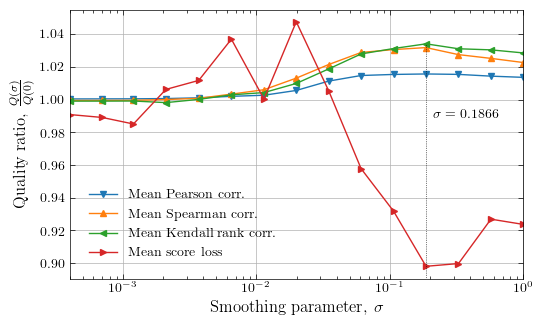

In [12]:
width = 3.487 * 1.6
height = width / 1.618

#fig = plt.figure()
ax = plt.gca()

for i in range(df.shape[1]):
    (df.iloc[:, i] / df.iloc[0, i]).plot(logx=True, ax=ax, figsize=(width, height), linewidth=1,
                                         marker=mpl.markers.MarkerStyle().filled_markers[i + 1], markersize=4)

ylim = plt.ylim()
sigma_opt = df['Mean Spearman corr.'].argmax()
plt.plot([sigma_opt, sigma_opt], [0, (df / df.iloc[0]).iloc[df['Mean Spearman corr.'].index == sigma_opt].max().max()], color='black', linewidth=0.5, linestyle=":")
plt.ylim(ylim)

plt.annotate(r'$\sigma={:.4f}$'.format(sigma_opt),
             xy=(sigma_opt, ylim[0]), xycoords='data',
             xytext=(+5, +115), textcoords='offset points')

plt.xlabel(r'Smoothing parameter, $\sigma$')
plt.ylabel(r'Quality ratio, $\frac{Q(\sigma)}{Q(0)}$')
#plt.title('Training: CASP\{5-9\}, Test: CASP10', fontsize=12)
plt.tight_layout()

#for spine in ['top', 'right']:
#    ax.spines[spine].set_visible(False)

for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_linewidth(0.5)

ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
ax.grid(linewidth=0.5)
lg = ax.legend(frameon=False, loc=(0.03, 0.05))
lg.get_frame().set_linewidth(0.5)
#lg.draw_frame(False)

plt.savefig('smoothing_dependency.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Learning curves

In [7]:
filename = 'learning_curve_CASP11Stage12'
x = pd.DataFrame.from_csv(filename + '.csv')

df = -x[['Mean Pearson', 'Mean Spearman', 'Mean Kendall tau']]
df['Mean loss score'] = x['Mean loss score'].abs()
df['Data'] = x.Model.apply(lambda x: 'CASP' if x.startswith('ridge_pipeline_CASP_') else 'NMA' if x.startswith('ridge_pipeline_NMA_') else 'CASP and NMA')
df.index = pd.Series(x.Model.apply(lambda x: int(x.split('__')[-2].split('_')[-1])), name='Domains number')
df.rename_axis({'Mean Pearson': 'Mean Pearson corr.',
                'Mean Spearman': 'Mean Spearman corr.',
                'Mean Kendall tau': 'Mean Kendall rank corr.',
                'Mean loss score': 'Mean score loss'}, axis=1, inplace=True)

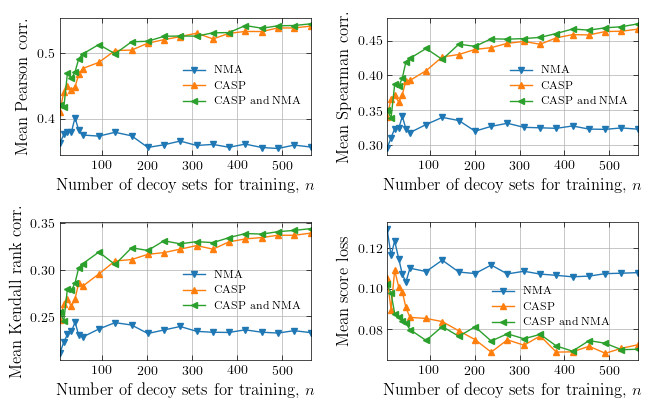

In [8]:
width = 3.487 * 1.6 * 1.2
height = width / 1.618

fig, ax = plt.subplots(2, 2, figsize=(width, height))

for i, metric in enumerate(df.columns[:-1]):
    x = df.pivot_table(index=df.index, columns='Data', values=metric)
    for j, l in enumerate(['NMA', 'CASP', 'CASP and NMA']):
        y = x[l]
        y.plot(ax=ax[i//2, i%2], linewidth=1, marker=mpl.markers.MarkerStyle().filled_markers[j + 1], markersize=5)

    for spine in ['left', 'bottom', 'top', 'right']:
        ax[i//2, i%2].spines[spine].set_linewidth(0.5)
    ax[i//2, i%2].tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
    ax[i//2, i%2].grid(linewidth=0.5)
    lg = ax[i//2, i%2].legend(frameon=False, loc='best', fontsize=8)
    if i == 3:
        lg = ax[i//2, i%2].legend(frameon=False, loc=(.4, .2), fontsize=8)
    lg.get_frame().set_linewidth(0.5)
    ax[i//2, i%2].set_xlabel(r'Number of decoy sets for training, $n$')
    ax[i//2, i%2].set_ylabel(metric)

plt.tight_layout()
plt.savefig(filename + '.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Density function features

In [44]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import itertools

x = np.linspace(0, 15, 100)
_, x_bin_edges = np.histogram(x, bins=5)
x_digits = np.digitize(x, x_bin_edges, right=False)

y = np.linspace(0, np.pi, 100)
_, y_bin_edges = np.histogram(y, bins=5)
y_digits = np.digitize(y, y_bin_edges, right=False)

z = set(itertools.product(x_digits, y_digits))
z = {pair: np.clip(np.random.randint(-100, 100), 0, np.inf) for pair in z}
for i in x_digits:
    z[(min(x_digits), i)] = z[max(x_digits), i] = 0
for i in y_digits:
    z[(i, min(y_digits))] = z[i, max(y_digits)] = 0
X, Y = np.meshgrid(x, y)
X_digits, Y_digits = np.meshgrid(x_digits, y_digits)
Z = np.array([z[(first, second)] for first, second in zip(X_digits.ravel(), Y_digits.ravel())]).reshape(X.shape)

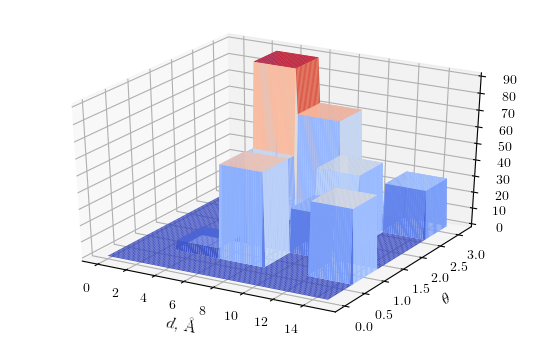

In [45]:
width = 3.487 * 1.6
height = width / 1.618

fig = plt.figure(figsize=(width * 1.2, height * 1.2))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
#fig.colorbar(surf, shrink=0.5, aspect=10)
plt.xlabel(r'$d$, \AA')
plt.ylabel(r'$\theta$')
plt.savefig('df_features.pdf', format='pdf', bbox_inches='tight')
plt.show()